In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.options.display.max_columns=500
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'b065f4af0ec9e13e3451b5b7ce1c4bcc'

Creating a Fred Object

In [2]:
fred = Fred(api_key=fred_key)

Searching for economical data

In [3]:
sp_search = fred.search('S&P', order_by='popularity')

In [4]:
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2024-05-25   2024-05-25   
CSUSHPINSA              CSUSHPINSA     2024-05-25   2024-05-25   
SP500                        SP500     2024-05-25   2024-05-25   
MEHOINUSA672N        MEHOINUSA672N     2024-05-25   2024-05-25   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2024-05-25   2024-05-25   
...                            ...            ...          ...   
DDDI12SMA156NWDB  DDDI12SMA156NWDB     2024-05-25   2024-05-25   
DDDI01GTA156NWDB  DDDI01GTA156NWDB     2024-05-25   2024-05-25   
Q03069USQ605NNBR  Q03069USQ605NNBR     2024-05-25   2024-05-25   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2024-05-25   2024-05-25   
CSHMCPNPA156NRUG  CSHMCPNPA156NRUG     2024-05-25   2024-05-25   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
...                                                             ...   
DDDI12SMA156NWDB  Private Credit by Deposit Money Banks and Othe...   
DDDI01GTA156NWDB  Private Credit by Deposit Money Banks to GDP f...   
Q03069USQ605NNBR  Revenue Freight Tons Originated, Less Than Car...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHMCPNPA156NRUG  Share of Merchandise Imports at Current Purcha...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2024-05-23  Daily, Close   
CSUSHPINSA              1987-01-01      2024-02-01       Monthly   
SP500                   2014-05-27      2024-05-24  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2024-05-23  Daily, Close   
...                            ...             ...           ...   
DDDI12SMA156NWDB        2001-01-01      2020-01-01        Annual   
DDDI01GTA156NWDB        1960-01-01      2021-01-01        Annual   
Q03069USQ605NNBR        1920-01-01      1943-07-01     Quarterly   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHMCPNPA156NRUG        1960-01-01      2019-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
MEHOINUSA672N                  A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
...                          ...                             ...   
DDDI12SMA156NWDB               A                         Percent   
DDDI01GTA156NWDB               A                         Percent   
Q03069USQ605NNBR               Q               Thousands of Tons   
CSHXCPVEA156NRUG               A                         Percent   
CSHMCPNPA156NRUG               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seaso

Pulling raw data

In [5]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

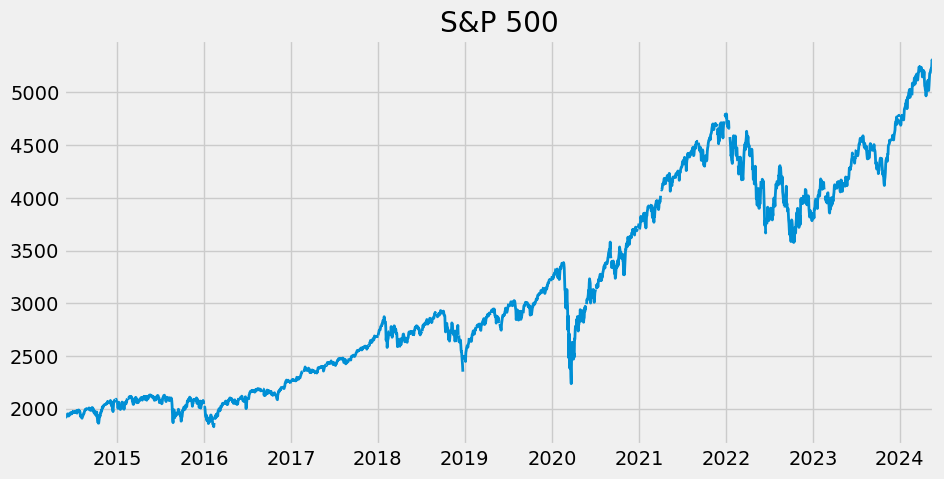

In [6]:
sp500.plot(figsize=(10,5),title='S&P 500', lw = 2)

Pulling and Joining multiple Data Series

In [7]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

In [8]:
all_results =[]

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [9]:
unemp_results = pd.concat(all_results, axis=1)

In [10]:
unemp_results

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-01   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.2   3.6   4.7   
2024-01-01   5.2   3.9   4.5   3.1   3.4   3.7   4.0   2.9   3.0   3.5   4.7   
2024-02-01   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   3.5   4.8   
2024-03-01   5.3   3.9   4.3   3.2   3.4   3.8   3.9   3.0   2.9   3.5   4.8   
2024-04-01   5.3   4.0   4.2   3.3   3.4   4.0   3.9   3.1   2.9   3.5   4.8   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-01   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   2.7   3.4   
2024-01-01   4.8   3.1   3.4   4.2   3.2   3.0   4.3   3.0   4.0   2.7   3.5   
2024-02-01   4.8   3.1   3.5   4.1   3.0   3.0   4.4   3.1   3.9   2.7   3.3   
2024-03-01   4.8   3.1   3.7   3.8   3.0   2.9   4.5   3.1   3.8   2.7   3.2   
2024-04-01   4.7   3.1   3.7   3.6   2.9   2.8   4.6   3.2   3.8   2.7   3.1   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-01   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-01-01   4.6   2.3   4.1   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-02-01   4.7   2.4   4.2   4.3   5.2   3.6   3.6   3.3   4.6   3.0   2.8   
2024-03-01   4.8   2.5   4.2   4.3   5.1   3.5   3.5   3.3   4.6   2.9   2.8   
2024-04-01   4.8   2.6   4.2   4.3   5.1   3.4   3.5   3.4   4.6   2.8   2.8   

            PRUR  INUR  LAUR  HIUR  LASMT261982000000003  NDUR  MTUR  DCUR  \
1976-01-01  19.6   6.6   6.3   9.8                   NaN   3.4   5.8   8.7   
1976-02-01  19.5   6.6   6.3   9.8                   NaN   3.4   5.8   8.7   
1976-03-01  19.3   6.5   6.3   9.8                   NaN   3.4   5.8   8.6   
1976-04-01  19.0   6.3   6.4   9.7                   NaN   3.5   5.8   8.5   
1976-05-01  18.9   6.0   6.5   9.4                   NaN   3.6   5.8   8.4   
...          ...   ...   ...   ...                   ...   ...   ...   ...   
2023-12-01   5.7   3.5   4.0   3.0                   4.0   1.9   3.3   4.9   
2024-01-01   5.7   3.5   4.1   3.1                   3.9   1.9   3.3   5.0   
2024-02-01   5.7   3.5   4.2   3.1                   3.8   2.0   3.4   5.1   
2024-03-01   5.8   3.5   4.4   3.1                   3.8   2.0   3.3   5.2   
2024-04-01   5.8   3.6   4.3   3.1                   NaN   2.0   3.1   5.2   

            MSUR  MEUR  NEUR  LASMT391746000000003  CTUR  IDUR  NHUR  RIUR  \
1976-01-01   6.7   8.7   3.3                   NaN   9.8   5.6   6.5   7.8   
1976-02-01   6.7   8.7   3.3        

In [28]:
unemp_states = unemp_results.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [29]:
#Plot States Unemployment Rate
px.line(unemp_states)

C:\Users\Admin\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Pulling April 2020 Unemployment Rate Per State

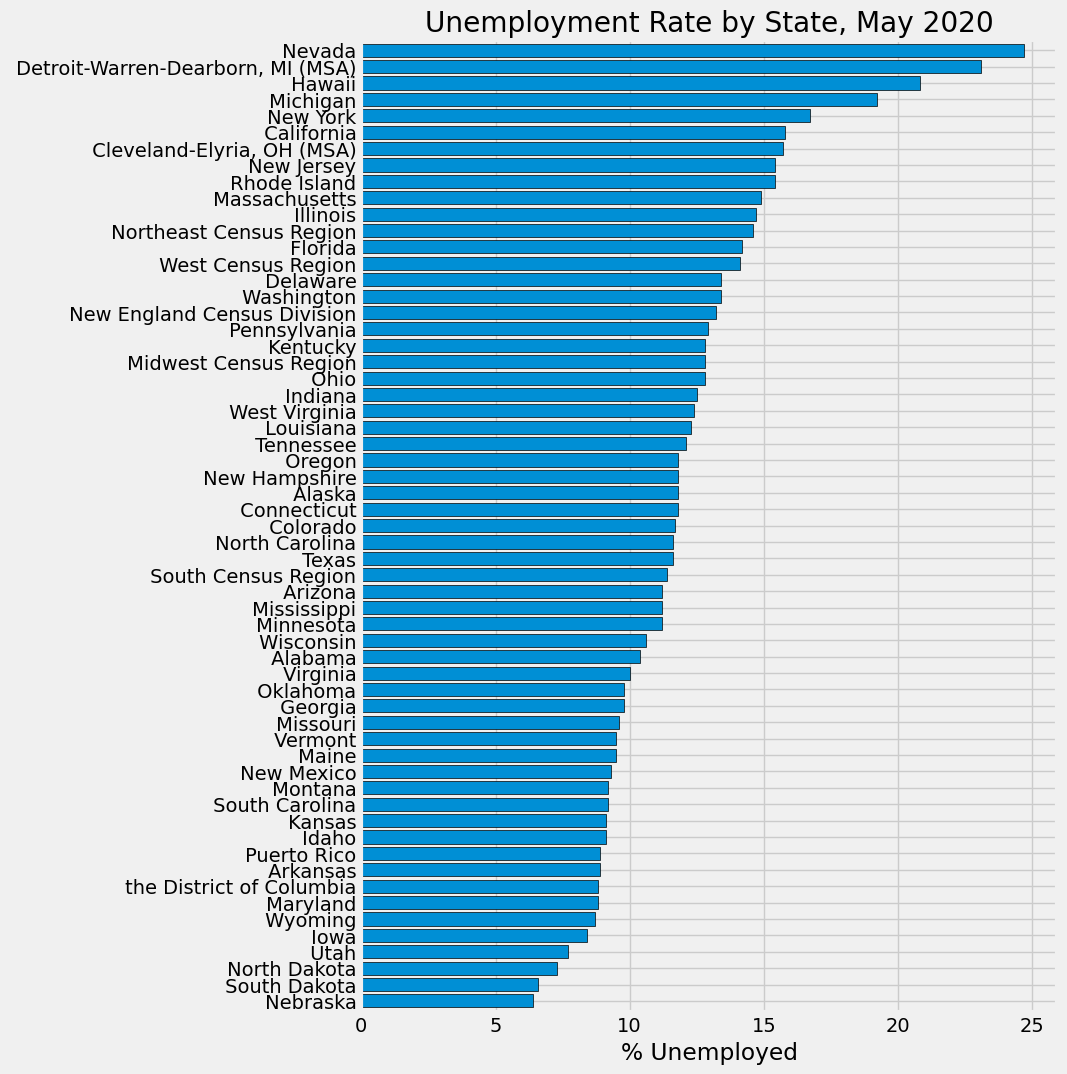

In [38]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8,12), width = 0.8, edgecolor = 'black',
        title = 'Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

Pulling Participation Rate

In [51]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]

In [52]:
part_df

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-05-25   2024-05-25   
LBSSA01    LBSSA01     2024-05-25   2024-05-25   
LBSSA36    LBSSA36     2024-05-25   2024-05-25   
LBSSA26    LBSSA26     2024-05-25   2024-05-25   
LBSSA28    LBSSA28     2024-05-25   2024-05-25   
LBSSA48    LBSSA48     2024-05-25   2024-05-25   
LBSSA12    LBSSA12     2024-05-25   2024-05-25   
LBSSA21    LBSSA21     2024-05-25   2024-05-25   
LBSSA39    LBSSA39     2024-05-25   2024-05-25   
LBSSA55    LBSSA55     2024-05-25   2024-05-25   
LBSSA42    LBSSA42     2024-05-25   2024-05-25   
LBSSA25    LBSSA25     2024-05-25   2024-05-25   
LBSSA27    LBSSA27     2024-05-25   2024-05-25   
LBSSA24    LBSSA24     2024-05-25   2024-05-25   
LBSSA54    LBSSA54     2024-05-25   2024-05-25   
LBSSA47    LBSSA47     2024-05-25   2024-05-25   
LBSSA23    LBSSA23     2024-05-25   2024-05-25   
LBSSA17    LBSSA17     2024-05-25   2024-05-25   
LBSSA37    LBSSA37     2024-05-25   2024-05-25   
LBSSA13    LBSSA13     2024-05-25   2024-05-25   
LBSSA22    LBSSA22     2024-05-25   2024-05-25   
LBSSA45    LBSSA45     2024-05-25   2024-05-25   
LBSSA08    LBSSA08     2024-05-25   2024-05-25   
LBSSA49    LBSSA49     2024-05-25   2024-05-25   
LBSSA51    LBSSA51     2024-05-25   2024-05-25   
LBSSA18    LBSSA18     2024-05-25   2024-05-25   
LBSSA29    LBSSA29     2024-05-25   2024-05-25   
LBSSA34    LBSSA34     2024-05-25   2024-05-25   
LBSSA19    LBSSA19     2024-05-25   2024-05-25   
LBSSA02    LBSSA02     2024-05-25   2024-05-25   
LBSSA53    LBSSA53     2024-05-25   2024-05-25   
LBSSA04    LBSSA04     2024-05-25   2024-05-25   
LBSSA35    LBSSA35     2024-05-25   2024-05-25   
LBSSA16    LBSSA16     2024-05-25   2024-05-25   
LBSSA05    LBSSA05     2024-05-25   2024-05-25   
LBSSA40    LBSSA40     2024-05-25   2024-05-25   
LBSSA31    LBSSA31     2024-05-25   2024-05-25   
LBSSA15    LBSSA15     2024-05-25   2024-05-25   
LBSSA32    LBSSA32     2024-05-25   2024-05-25   
LBSSA30    LBSSA30     2024-05-25   2024-05-25   
LBSSA41    LBSSA41     2024-05-25   2024-05-25   
LBSSA33    LBSSA33     2024-05-25   2024-05-25   
LBSSA50    LBSSA50     2024-05-25   2024-05-25   
LBSSA09    LBSSA09     2024-05-25   2024-05-25   
LBSSA38    LBSSA38     2024-05-25   2024-05-25   
LBSSA46    LBSSA46     2024-05-25   2024-05-25   
LBSSA20    LBSSA20     2024-05-25   2024-05-25   
LBSSA44    LBSSA44     2024-05-25   2024-05-25   
LBSSA11    LBSSA11     2024-05-25   2024-05-25   
LBSSA10    LBSSA10     2024-05-25   2024-05-25   
LBSSA56    LBSSA56     2024-05-25   2024-05-25   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA13           Lab

In [79]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
all_results =[]

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)

In [80]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [85]:
part_states.columns = part_states.columns.str.strip()

In [87]:
unemp_states.columns = unemp_states.columns.str.strip()

Plotting Unemployment vs Participation

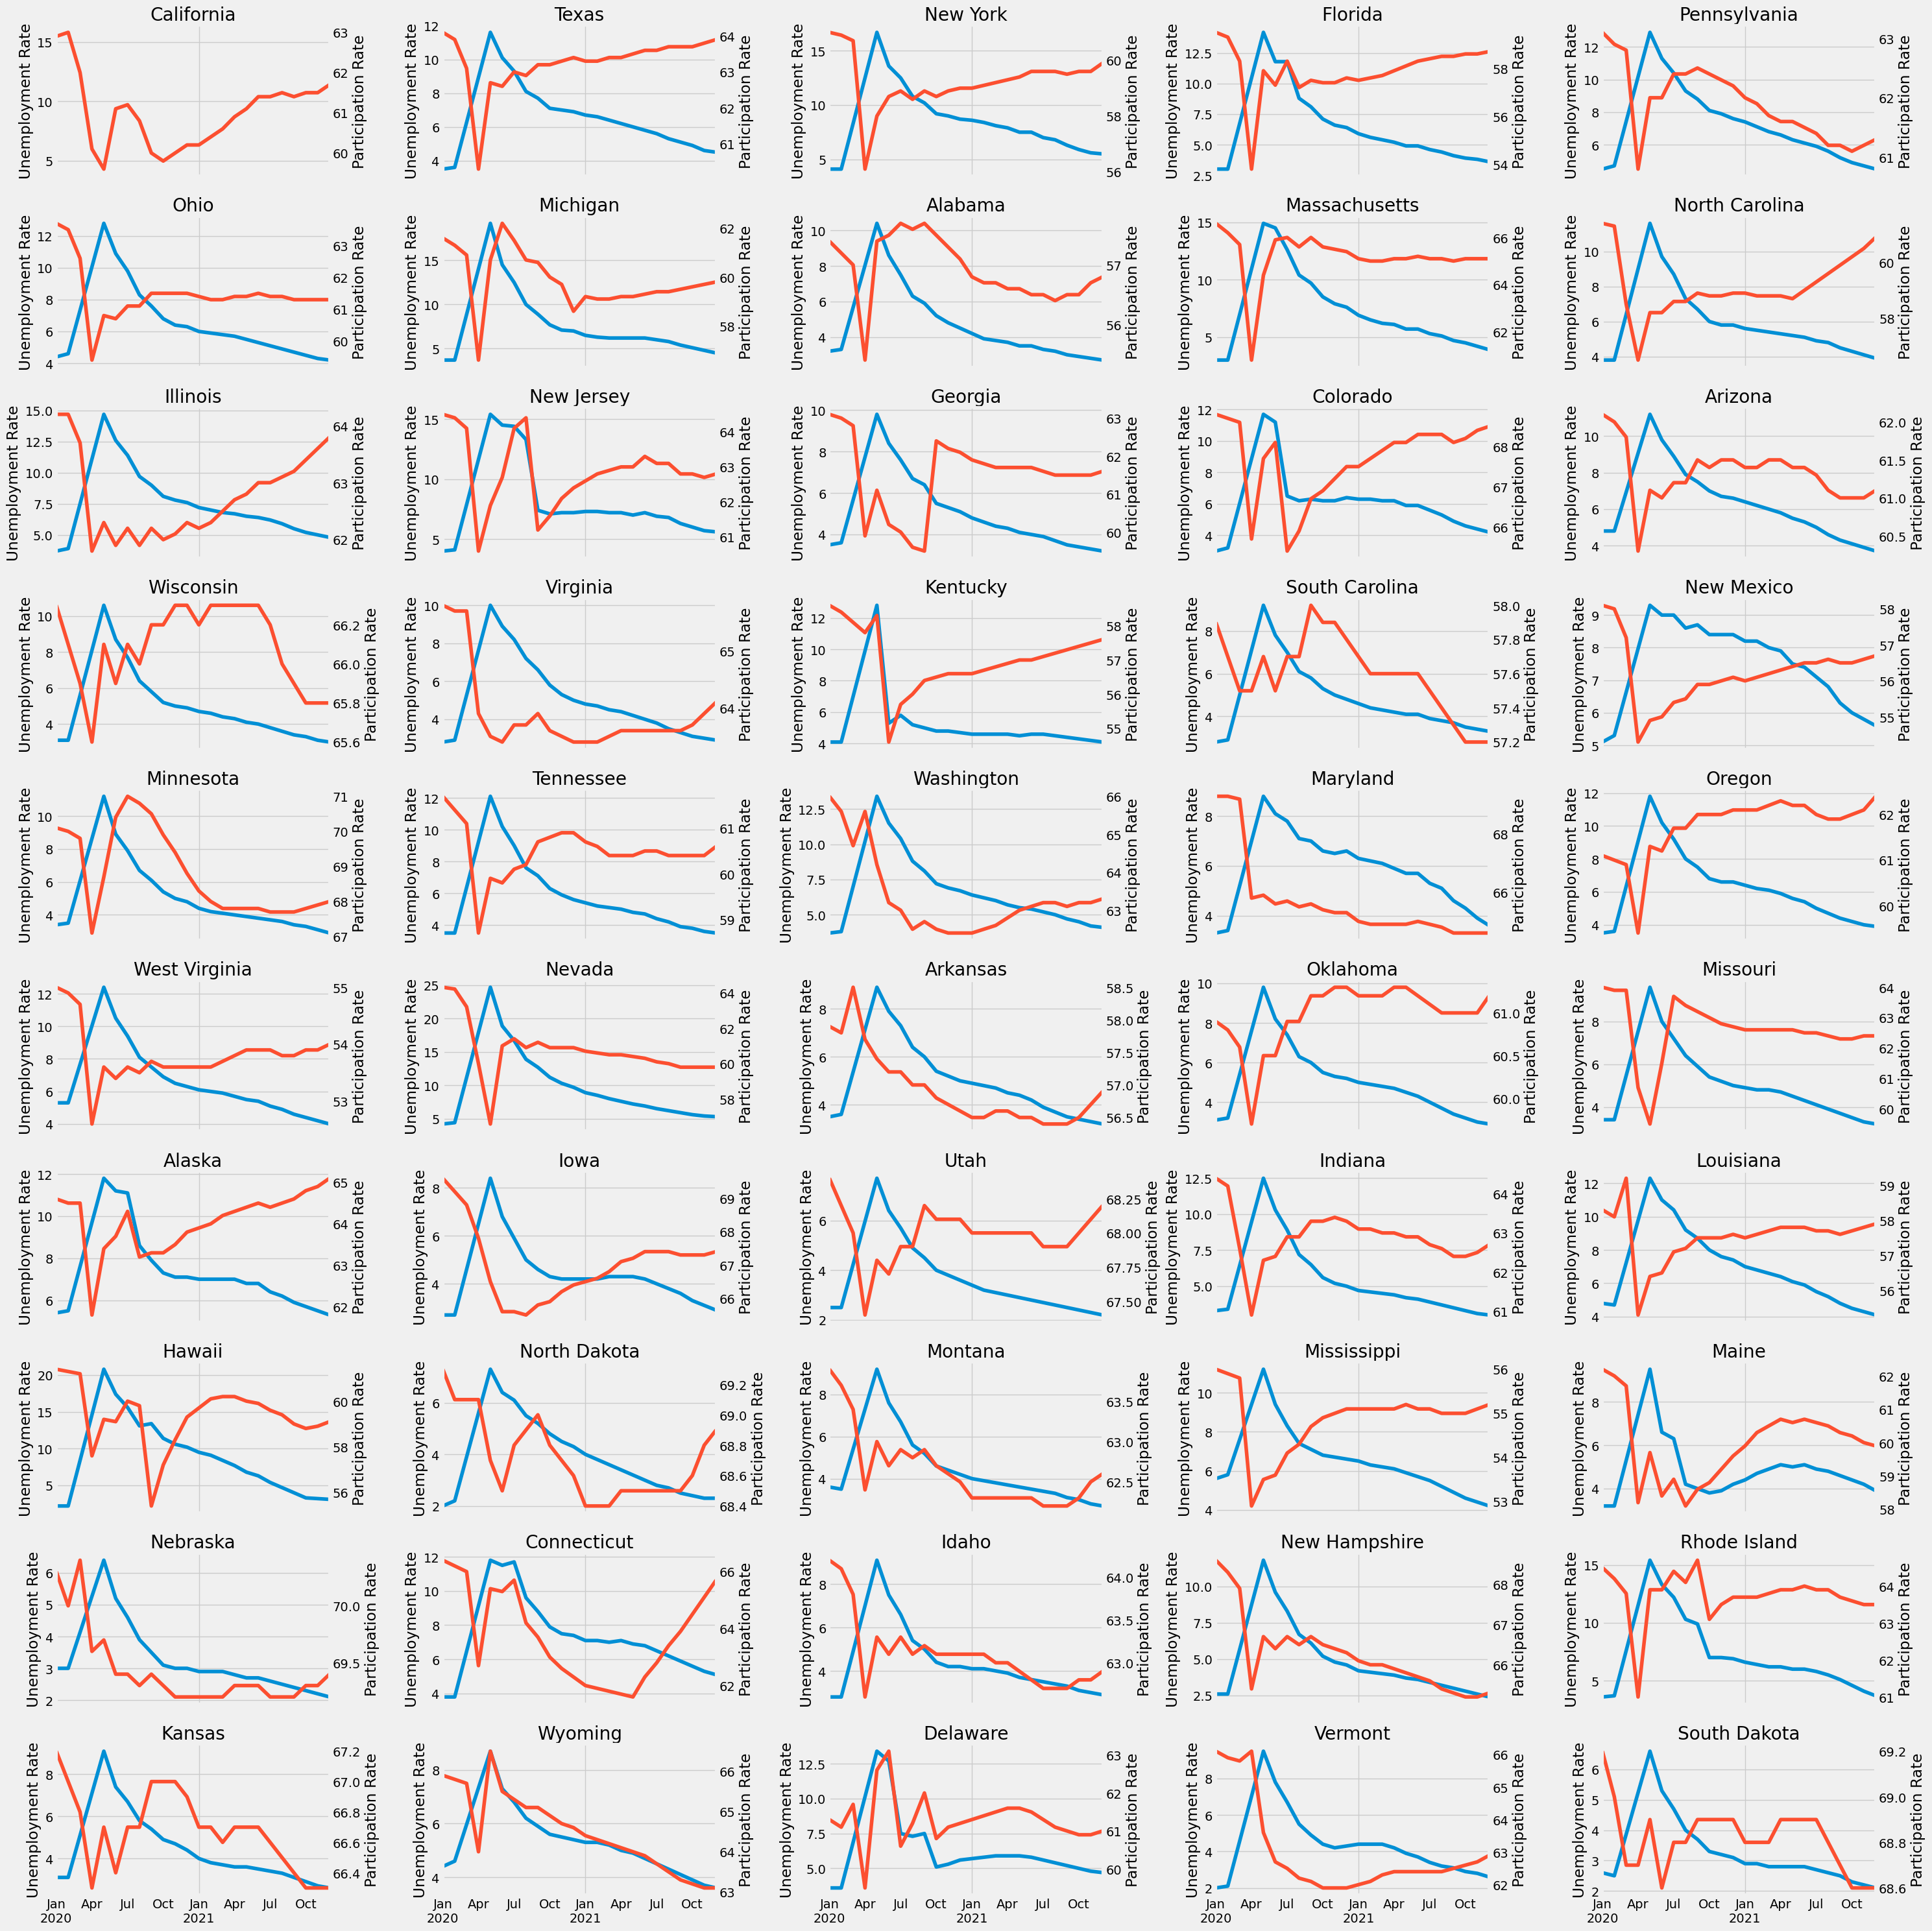

In [136]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex = True)
axs = axs.flatten()
i=0
for state in unemp_states.columns:
    if state not in part_states.columns:
        continue
    ax = axs[i]
    ax2 = ax.twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax, label = "Unemployment", color=color_pal[0])
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label = "Participation", color=color_pal[1])
    ax.set_ylabel('Unemployment Rate')
    ax2.set_ylabel('Participation Rate')
    ax.set_title(state)
    ax2.grid(False)
    i += 1
plt.tight_layout()
plt.show()